# 캐글 타이타닉 생존자 예측 데이터 분석

### 데이터는 pandas를 사용해서 분석하자.

In [8]:
import pandas as pd

In [17]:
# 데이터 파일 경로
dataPath = "../data"

### pandas로 데이터를 읽어오자.

In [19]:
train = pd.read_csv(dataPath + "/train.csv")
test = pd.read_csv(dataPath + "/test.csv")

### 학습데이터의 내용 확인
head를 사용하면 데이터 상위 5줄만 보여준다.

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic. (형재자매 / 배우자)
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- Fare: 여객운임
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton (탑승한 항구)

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터의 row 확인

In [13]:
train.shape

(891, 12)

In [14]:
test.shape

(418, 11)

### 데이터 정보 확인
학습데이터에서는 missing data가 age, cabin, embarked 컬럼에 존재

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


테스트 데이터에서도 missing data가 Age, Fare, Cabin 컬럼에 존재

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### missing data를 좀더 확인하자

In [23]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test.isnull().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

각 특징 별로 생존정보를 그려주는 함수를 만들고 특징 별 생존정보 확인하자

In [28]:
def bar_chart (feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

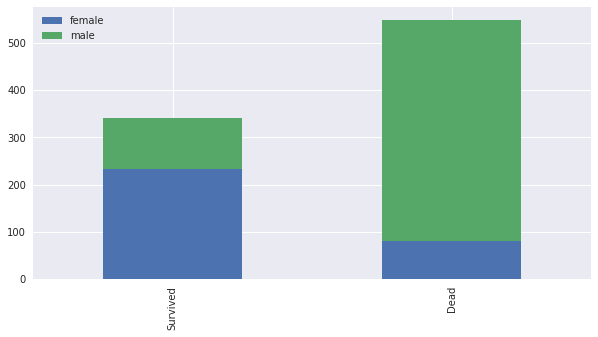

In [29]:
bar_chart('Sex')

남자가 여자보다 많이 사망.....

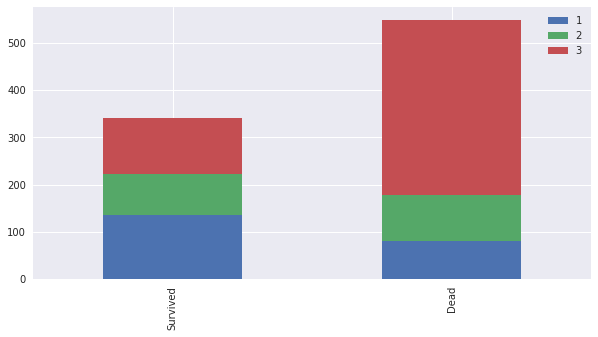

In [30]:
bar_chart('Pclass')

3등급칸의 사망 비율이 높다.

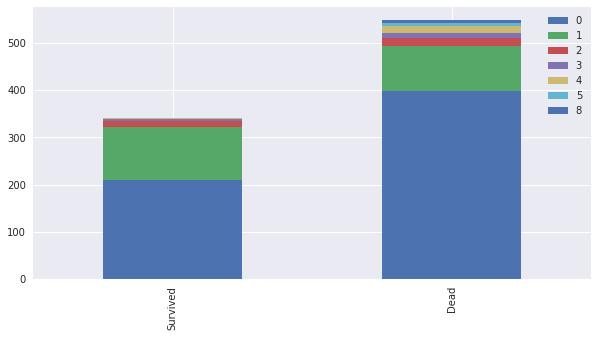

In [32]:
bar_chart('SibSp')

형재자매/배우자 없이 혼자 탐승했던 사람의 사망율이 높다.

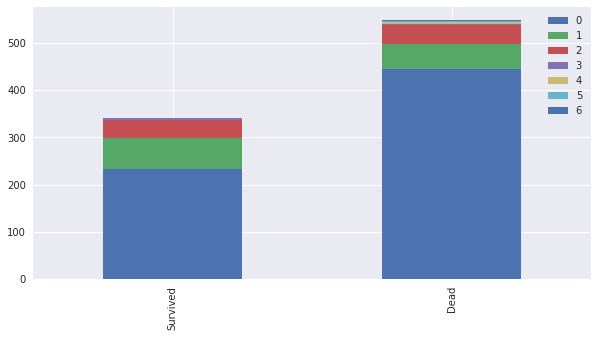

In [33]:
bar_chart('Parch')

부모/자녀 없이 혼자 탑승했던 사람의 사망률이 높다.

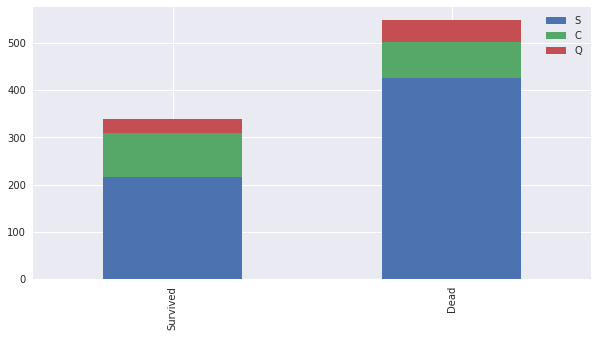

In [35]:
bar_chart('Embarked')

S 항구에서 탑생한 사람의 사망률이 높다.

## Feature engineering

모든 문자는 숫자로 만들자.

### 이름
이름에서 타이틀을 분리하자... 여자, 남자, 기혼, 미혼 등이 생존과 관련성이 높을 수 있다.

In [38]:
train_test_data = [train, test] # combining train and test dataset

In [51]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [53]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Mme           1
Lady          1
Countess      1
Capt          1
Jonkheer      1
Sir           1
Don           1
Name: Title, dtype: int64

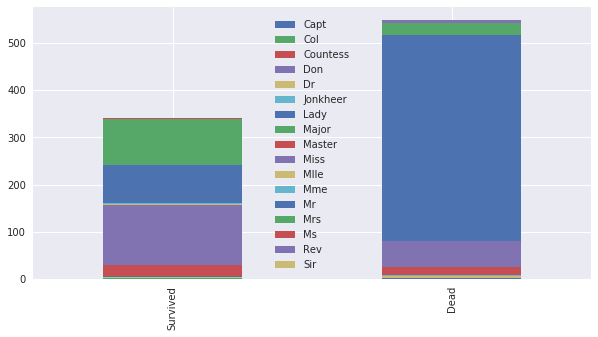

In [54]:
bar_chart('Title')

In [55]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [56]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2
                            , "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3
                            , "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt":3, "Sir":3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


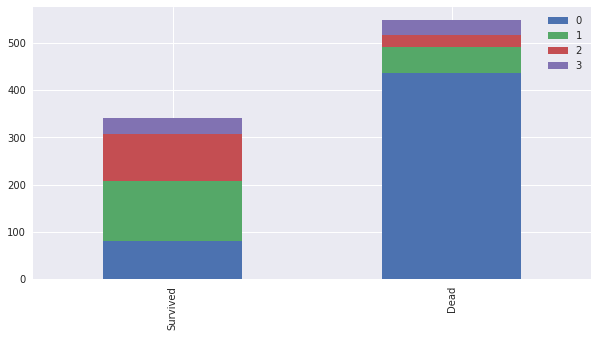

In [58]:
bar_chart('Title')

이제 이름 정보를 필요없으니 제거하자

In [59]:
train.drop(labels='Name', axis=1, inplace=True)
test.drop(labels='Name', axis=1, inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Sex
남자는 0, 여자는 1로 수정하자

In [63]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,0


### Age
missing data가 있다.
missing data는 통계정보를 바탕으로 채워주자.

In [65]:
for dataset in train_test_data:
    dataset["Age"].fillna(dataset.groupby('Title')['Age'].transform('median'), inplace=True)

In [67]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

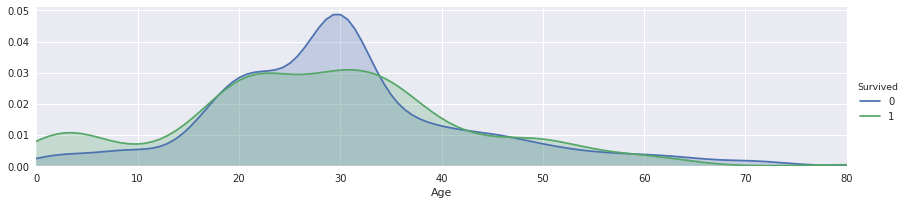

In [69]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

(0, 20)

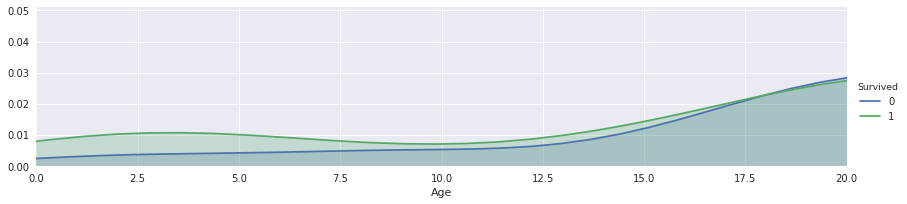

In [71]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)